# 介紹幾種 Optimizer 

## Momentum

維持 `v` 速度，並且乘上一個參數 $\alpha$

$$
v_t = \alpha * v_{t-1} + \gamma * J(W) \\
W_{t} = W_{t-1} + v
$$

`v` 為速度，$J(W)$ 為 cost function 的梯度，如果梯度方向和之前一致，則會逐漸增加動量，反之則會衰減，來避免 SGD 不穩定的步伐。


## AdaGrad

一般的學習率會是個定值，學習率的選擇是個難題，太小會因為步伐太小，導致花了很多時間才找到最小值，太大的話則會來回震盪，無法輕易找到最佳值。
在剛開始我們希望學習率高一點，在權重逐漸穩定後，學習率開始逐步下降。
這個技巧稱為**學習率衰減(decay)**。

AdaGrad 的公式如下：

$$
G = G + J(\theta) * J(\theta) \\
W = W - \alpha * \frac{1}{\sqrt G} * J(\theta)
$$

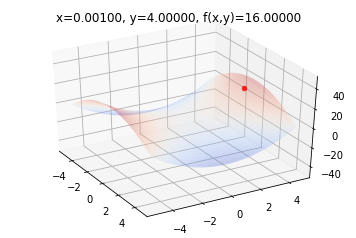

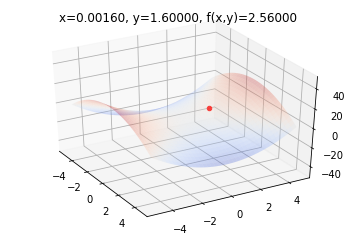

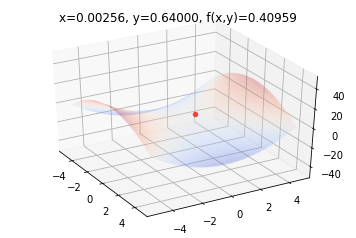

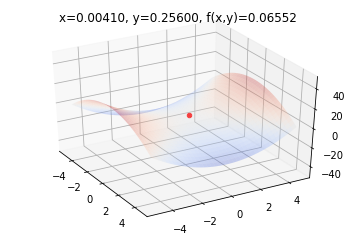

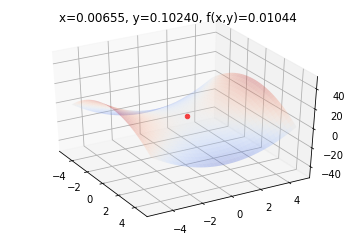

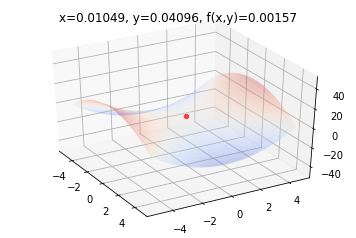

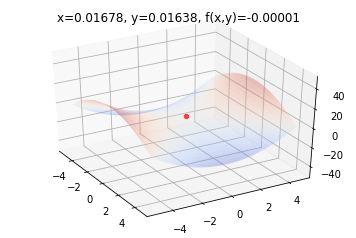

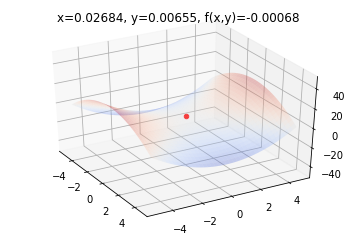

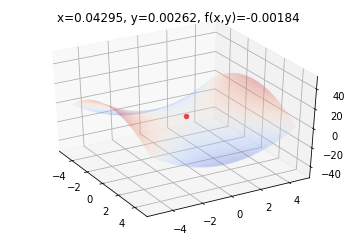

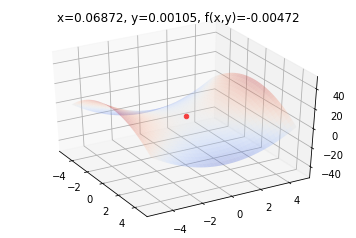

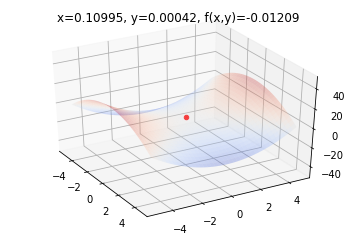

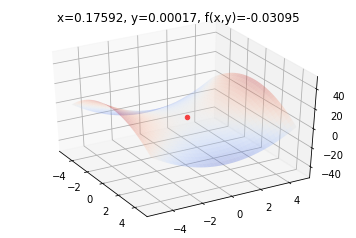

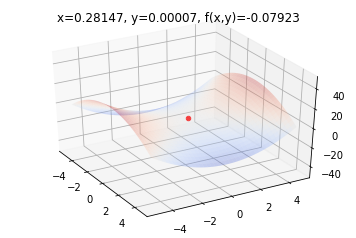

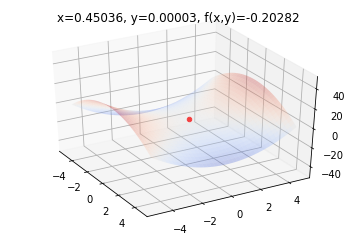

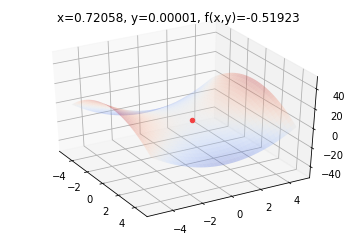

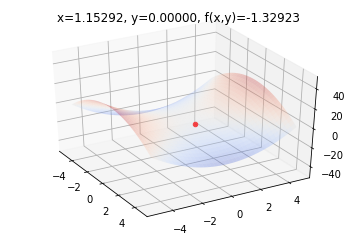

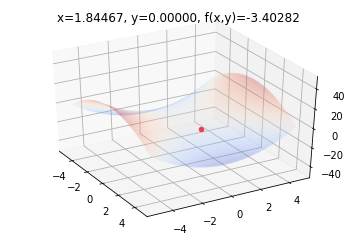

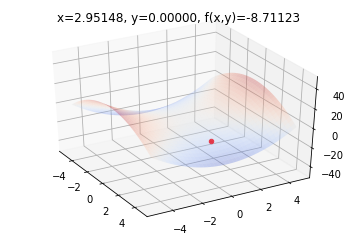

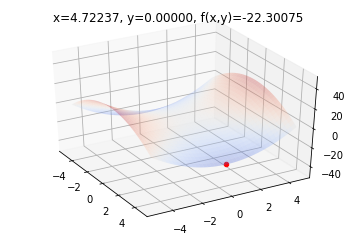

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def func(x,y):
  return (y**2-x**2)

def func_grad(x,y):
  return (-2*x, 2*y)

def plot_func(xt,yt,c='r'):
  fig = plt.figure()
  ax = fig.gca(projection='3d',
        elev=35., azim=-30)
  X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
  Z = func(X,Y) 
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
    cmap=cm.coolwarm, linewidth=0.1, alpha=0.3)
  ax.set_zlim(-50, 50)
  ax.scatter(xt, yt, func(xt,yt),c=c, marker='o' )
  ax.set_title("x=%.5f, y=%.5f, f(x,y)=%.5f"%(xt,yt,func(xt,yt))) 
  plt.show()
  plt.close()

def run_grad():
  xt = 0.001 
  yt = 4 
  eta = 0.3 
  plot_func(xt,yt,'r')
  for i in range(20):
    gx, gy = func_grad(xt, yt)
    xt = xt - eta*gx
    yt = yt - eta*gy
    if xt < -5 or yt < -5 or xt > 5 or yt > 5:
      break
    plot_func(xt,yt,'r')

def run_adagrad():
  xt = 0.001
  yt = 4 
  eta = 1.0 
  Gxt = 0
  Gyt = 0
  plot_func(xt,yt,'b')
  for i in range(20):
    gxt,gyt = func_grad(xt, yt)
    Gxt += gxt**2
    Gyt += gyt**2
    xt = xt - eta*(1./(Gxt**0.5))*gxt
    yt = yt - eta*(1./(Gyt**0.5))*gyt
    if xt < -5 or yt < -5 or xt > 5 or yt > 5:
      break
    plot_func(xt,yt,'b')


run_grad()